# Explore different embedding spaces of Axiom data

Look at PCA and UMAP of Axiom data with different features. Explore how correlated the Dino and CP CNN features are.

In [43]:
# Imports

import polars as pl
import pandas as pd
import anndata
import scanpy as sc

In [3]:
# Paths
prof_path = "/Users/jewald/repos/2024_09_09_Axiom_OASIS/1_snakemake/outputs/cpcnn/mad_featselect/profiles/mad_featselect.parquet"

In [35]:
data = pd.read_parquet(prof_path)
metadata_cols = [col for col in data.columns if "Metadata" in col]


In [36]:
data.sort_values(["Metadata_Plate", "Metadata_Well"], inplace=True)
data.index = [f"{row['Metadata_Plate']}__{row['Metadata_Well']}" for _, row in data.iterrows()]
data = data.loc[~data.index.duplicated(keep='first')]

In [39]:
metadata = data[metadata_cols]
adata = anndata.AnnData(X=data.drop(metadata_cols, axis=1))
adata.obs = adata.obs.merge(metadata, left_index=True, right_index=True)


In [44]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/jewald/miniforge3/envs/axiom/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 668 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/jewald/miniforge3/envs/axiom/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


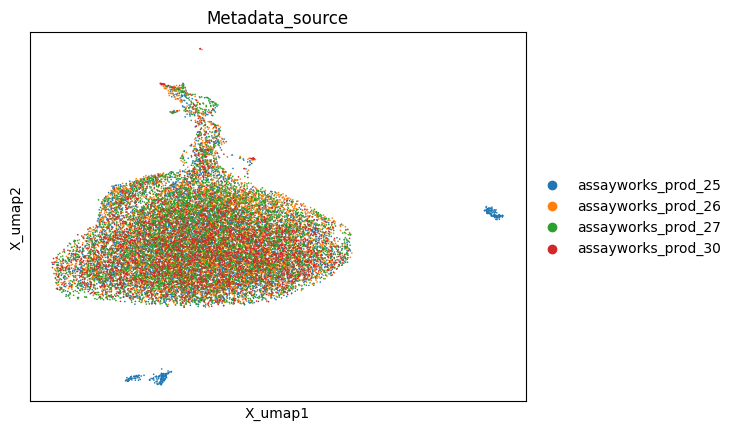

In [45]:
sc.pl.embedding(
    adata,
    "X_umap",
    color="Metadata_source"
)

<Axes: title={'center': 'Metadata_Compound'}, xlabel='X_umap1', ylabel='X_umap2'>

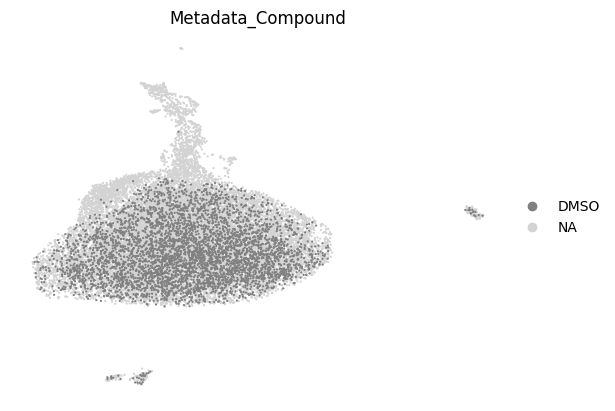

In [46]:
sc.pl.embedding(
    adata,
    "X_umap",
    color="Metadata_Compound",
    groups=["DMSO"],
    s=10,
    show=False,
    sort_order=True,
    frameon=False,
)